# 06 Antialiasing - Multi-process

* 기존 예제에서 for loop을 제거하고 multi-process를 적용하여 가속하는 예제입니다.

In [1]:
import multiprocessing as mp
from functools import partial

import numpy as np
import numpy.linalg as LA

import matplotlib.pyplot as plt

from _06_antialiasing import compute_ray_color, HittableList, Sphere, Camera

In [2]:
# image
aspect_ratio = 16.0 / 9.0
image_width = 320
image_height = int(image_width / aspect_ratio)
samples_per_pixel = 10

In [3]:
# world
world = HittableList()
world.add(Sphere(center=np.array([0.0, 0.0, -1.0]), radius=0.5))
world.add(Sphere(center=np.array([0.0, -100.5, -1.0]), radius=100.0))

In [4]:
# camera
camera = Camera()

In [5]:
uv_list = []
for row in range(image_height):
    for col in range(image_width):
        u = float(col) / (image_width - 1)
        v = float(row) / (image_height - 1)
        uv_list.append((u, v))

image_width_scale = 1.0 / (image_width - 1)
image_height_scale = 1.0 / (image_height - 1)

In [6]:
%%time

compute_ray_color_func = partial(
    compute_ray_color, 
    image_width_scale=image_width_scale, 
    image_height_scale=image_height_scale, 
    samples_per_pixel=samples_per_pixel, 
    camera=camera,
    world=world)

with mp.Pool(processes=4) as pool:
    output_list = pool.map(compute_ray_color_func, uv_list)
    pool.close()
    pool.join()

image = np.array(output_list).reshape(image_height, image_width, 3)

CPU times: total: 125 ms
Wall time: 5.07 s


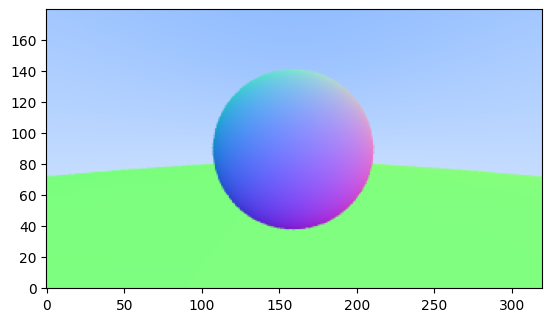

In [7]:
plt.imshow(image, origin="lower")
plt.show()